# Analiza i projektiranje računalom #

### 4. Domaća zadaća -  _Genetski algoritam_ ###

Učitavanje potrebnih biblioteka.

In [779]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Pomoćne funkcije.

In [780]:
def statistics(fitness_vector, tol=-1e-6):
    print('Broj pogodataka:', np.count_nonzero(fitness_vector > tol), '/', len(fitness_vector))
    print('Srednja vrijednost:', np.mean(fitness_vector))
    print('Medijan:           ', np.median(fitness_vector))
    print('Najbolja dobrota:  ', np.max(fitness_vector))
    
def make_boxplot(data_df=None, decimal_data=None, binary_data=None, title=''):
    if data_df is None:
        df = pd.DataFrame(data={'Decimalni': -np.log10(decimal_data*-1), 'Binarni': -np.log10(binary_data*-1)})
    else:
        df = -np.log10(data_df*-1)
    sns.boxplot(data=df)
    plt.ylabel('-log(-fitness)')
    plt.ylim(0, 8)
    plt.grid(True, linestyle='dotted', axis='y')
    plt.title(title)
    plt.show()
    
def foreach_column_in_df(df, action):
    for columnName, columnData in df.iteritems():
        print(columnName)
        action(columnData.values)
        print()

### 3. Zadatak ###

Učitavanje podatka iz datoteka.

In [781]:
f6d3d = np.loadtxt('data/task3/f6d3d.txt')
f6d3b = np.loadtxt('data/task3/f6d3b.txt')
f6d6d = np.loadtxt('data/task3/f6d6d.txt')
f6d6b = np.loadtxt('data/task3/f6d6b.txt')
f7d3d = np.loadtxt('data/task3/f7d3d.txt')
f7d3b = np.loadtxt('data/task3/f7d3b.txt')
f7d6d = np.loadtxt('data/task3/f7d6d.txt')
f7d6b = np.loadtxt('data/task3/f7d6b.txt')

Statistika za funkciju **F6** dimenzije **3** i **decimalnog** prikaza.

In [782]:
statistics(f6d3d)

Broj pogodataka: 15 / 30
Srednja vrijednost: -0.00412461741980467
Medijan:            -1.669969090983825e-06
Najbolja dobrota:   -1.5373662720641335e-07


Statistika za funkciju **F6** dimenzije **3** i **binarnog** prikaza.

In [783]:
statistics(f6d3b)

Broj pogodataka: 3 / 30
Srednja vrijednost: -0.010578290214466605
Medijan:            -0.009715909877789891
Najbolja dobrota:   -9.03007750685525e-07


**Boxplot** za **F6** dimenzije **3**:

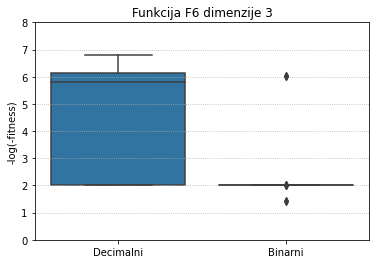

In [784]:
make_boxplot(decimal_data=f6d3d, binary_data=f6d3b, title='Funkcija F6 dimenzije 3')

Statistika za funkciju **F6** dimenzije **6** i **decimalnog** prikaza.

In [785]:
statistics(f6d6d)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.009715910930048114
Medijan:            -0.009715910187823362
Najbolja dobrota:   -0.009715909877707651


Statistika za funkciju **F6** dimenzije **6** i **binarnog** prikaza.

In [786]:
statistics(f6d6b)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.009723582147996948
Medijan:            -0.00971679616609089
Najbolja dobrota:   -0.00971591073428274


**Boxplot** za **F6** dimenzije **6**:

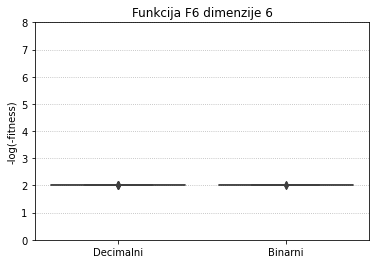

In [787]:
make_boxplot(decimal_data=f6d6d, binary_data=f6d6b, title='Funkcija F6 dimenzije 6')

Statistika za funkciju **F7** dimenzije **3** i **decimalnog** prikaza.

In [788]:
statistics(f7d3d)

Broj pogodataka: 30 / 30
Srednja vrijednost: -8.367395484230434e-07
Medijan:            -8.537996328070429e-07
Najbolja dobrota:   -4.94190108127658e-07


Statistika za funkciju **F7** dimenzije **3** i **binarnog** prikaza.

In [789]:
statistics(f7d3b)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.04138880469052282
Medijan:            -0.015295996148463232
Najbolja dobrota:   -0.007209012150852522


**Boxplot** za **F7** dimenzije **3**:

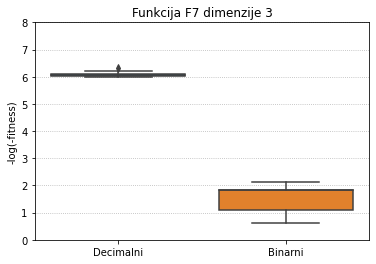

In [790]:
make_boxplot(decimal_data=f7d3d, binary_data=f7d3b, title='Funkcija F7 dimenzije 3')

Statistika za funkciju **F7** dimenzije **6** i **decimalnog** prikaza.

In [791]:
statistics(f7d6d)

Broj pogodataka: 14 / 30
Srednja vrijednost: -0.0031876240214638277
Medijan:            -0.005364481906723688
Najbolja dobrota:   -7.817185801689487e-07


Statistika za funkciju **F7** dimenzije **6** i **binarnog** prikaza.

In [792]:
statistics(f7d6b)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.03277445017280985
Medijan:            -0.03134949102907383
Najbolja dobrota:   -0.015148849509952404


**Boxplot** za **F7** dimenzije **6**:

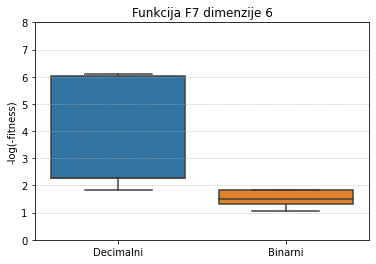

In [793]:
make_boxplot(decimal_data=f7d6d, binary_data=f7d6b, title='Funkcija F7 dimenzije 6')

### 4. Zadatak ###

#### Određivanje optimalne veličine populacije ####

Učitavanje `population_sizes.csv` datoteke.

In [831]:
population_sizes_df = pd.read_csv('data/task4/population_sizes.csv')

Statistika za veličine populacija:

In [832]:
foreach_column_in_df(population_sizes_df, statistics)

30
Broj pogodataka: 10 / 30
Srednja vrijednost: -0.005508440979348022
Medijan:            -0.009715909877514363
Najbolja dobrota:   -2.643185572082096e-07

50
Broj pogodataka: 9 / 30
Srednja vrijednost: -0.003604233676981555
Medijan:            -4.695643140015249e-05
Najbolja dobrota:   -3.7085461079833243e-07

100
Broj pogodataka: 16 / 30
Srednja vrijednost: -0.0037443857189631835
Medijan:            -9.1120260514721e-07
Najbolja dobrota:   -3.976305734676444e-08

200
Broj pogodataka: 6 / 30
Srednja vrijednost: -0.005152997051274982
Medijan:            -0.005058968055501489
Najbolja dobrota:   -1.629626488197644e-07



**Boxplot** za veličine populacija:

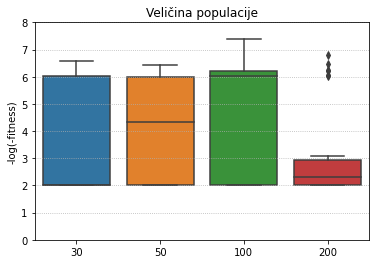

In [833]:
make_boxplot(data_df=population_sizes_df, title='Veličina populacije')

#### Određivanje optimalne vjerojatnosti mutacije ####

Učitavanje `mutations.csv` datoteke.

In [837]:
mutations_df = pd.read_csv('data/task4/mutations.csv')

Statistika za vjerojatnosti mutacije:

In [838]:
foreach_column_in_df(mutations_df, statistics)

0.1
Broj pogodataka: 1 / 30
Srednja vrijednost: -0.00907509388315444
Medijan:            -0.009715909877514363
Najbolja dobrota:   -6.527738741768374e-07

0.3
Broj pogodataka: 7 / 30
Srednja vrijednost: -0.007449003968576449
Medijan:            -0.009715909877514363
Najbolja dobrota:   -7.05955699453753e-08

0.6
Broj pogodataka: 9 / 30
Srednja vrijednost: -0.006334522743145678
Medijan:            -0.009715909877514363
Najbolja dobrota:   -1.0790380505776298e-07

0.9
Broj pogodataka: 3 / 30
Srednja vrijednost: -0.005443755019295582
Medijan:            -0.007743173138346077
Najbolja dobrota:   -2.4911482027212273e-07



**Boxplot** za vjerojatnost mutacije jedinke:

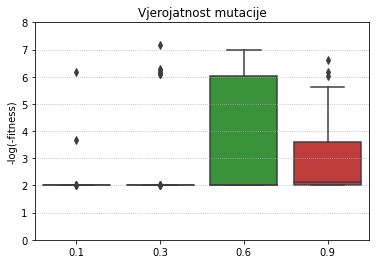

In [839]:
make_boxplot(data_df=mutations_df, title='Vjerojatnost mutacije')

#### Prikaz optimalne veličine populacije i optimalne vjerojatnosti mutacije ####

Učitavanje `optimal_population_mutation.txt` datoteke.

In [840]:
population_mutation = np.loadtxt('data/task4/optimal_population_mutation.txt')

Statistika za optimalnu veličinu populacije i vjerojatnost mutacije:

In [841]:
statistics(population_mutation)

Broj pogodataka: 13 / 30
Srednja vrijednost: -0.005505931167306344
Medijan:            -0.009715909877514362
Najbolja dobrota:   -2.0667034361654402e-07


### 5. Zadatak ###

#### Određivanje optimalnog turnira ####

Učitavanje `tournaments.csv` datoteke.

In [856]:
tournaments_df = pd.read_csv('data/task5/tournaments.csv')

Statistika za turnire:

In [857]:
foreach_column_in_df(tournaments_df, statistics)

3
Broj pogodataka: 11 / 30
Srednja vrijednost: -0.006153633149031524
Medijan:            -0.009715909877514363
Najbolja dobrota:   -1.4681756266288204e-07

5
Broj pogodataka: 4 / 30
Srednja vrijednost: -0.007559643855215013
Medijan:            -0.009715909877514415
Najbolja dobrota:   -4.059257593946874e-07

10
Broj pogodataka: 2 / 30
Srednja vrijednost: -0.007835128834470358
Medijan:            -0.009715909877514445
Najbolja dobrota:   -7.038397255021421e-07

15
Broj pogodataka: 3 / 30
Srednja vrijednost: -0.006328849409844032
Medijan:            -0.009715909877514415
Najbolja dobrota:   -7.318695560698529e-07

20
Broj pogodataka: 0 / 30
Srednja vrijednost: -0.007473175000896197
Medijan:            -0.009715909884754292
Najbolja dobrota:   -1.5336652417652367e-05

25
Broj pogodataka: 0 / 30
Srednja vrijednost: -0.006577303339503284
Medijan:            -0.009715909884552565
Najbolja dobrota:   -3.8121006418589947e-05

30
Broj pogodataka: 0 / 30
Srednja vrijednost: -0.008174617906836096

**Boxplot** za turnire:

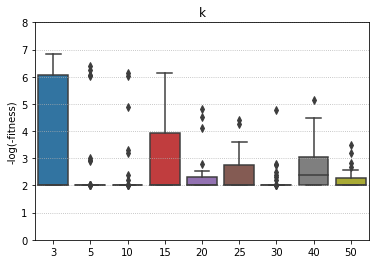

In [858]:
make_boxplot(data_df=tournaments_df, title='k')

#### Prikaz optimalnog turnira za optimalnu veličinu populacije i vjerojatnosti mutacije ####

Učitavanje `optimal_population_mutation_tournament.txt` datoteke.

In [861]:
population_mutation_tournament = np.loadtxt('data/task5/optimal_population_mutation_tournament.txt')

Statistika za optimalnu veličinu populacije, vjerojatnost mutacije i turnira:

In [862]:
statistics(population_mutation_tournament)

Broj pogodataka: 11 / 30
Srednja vrijednost: -0.00579322979469147
Medijan:            -0.009715909877514362
Najbolja dobrota:   -1.9033372022914108e-07
